In [60]:
import pytesseract
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [152]:
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"

In [2]:
image_path = "data/10-11-2020_16-35-35-qyrqt4lh.png"

image = cv2.imread(image_path)

In [3]:
pytesseract.image_to_string(image)

'Mi GT ~~\nFUT Champions Stadium | Referee: Shahzad Abu Shakra | FUT Champions\n\n120:00 ET\n\nCatamarcaFC 7 = 4 FCTXBVB\n\n  \n  \n \n  \n\nI ot ———\n\nTi Then ers\n\n  \n  \n  \n\n     \n\n  \n       \n \n   \n \n    \n\n| AWARDS YX\np N\nv7 (lela os\n9 STG\nt) SCHUM ELH\nMATCH HIGHLIGHTS -\nLy USS (0\nGo to www.easports.com/fifa/goals-of-the-\nA sy Tackles\nand submit your best goals. F Falls\ni) TTR\nMeal aT See\n, re 87 Soe\n\n \n\n \n\n   \n  \n \n\nFCT x BVB\n6\n5\n\n \n\n \n\n \n\n \n\x0c'

In [16]:
def detect_keras_ocr(image):
    image = cv2.blur(image, (3, 3))
    plt.imshow(image)
    plt.show()
    detections = pipeline.recognize([image])[0]
    recognized_text = ""
    for i in detections:
        recognized_text = recognized_text + " " + i[0]
    return recognized_text.strip()

def easy_ocr_reader(image):
    result = reader.readtext(image, detail = 0)
    if len(result) > 0 :
        return result[0]
    else:
        return None

def detect_statistic_digits_pytesseract(image):
    config = r'--psm 6 --oem 3 -c tessedit_char_whitelist=0123456789'
    result = pytesseract.image_to_string(image[440:850, 970:1100], config=config)
    return result.split("\n")[:-1]
    
def read_text(image):
    return detect_pytesseract(image)
    #return detect_keras_ocr(image)
    #return easy_ocr_reader(image)
    
def read_statistic_digits(image):
    home = detect_statistic_digits_pytesseract(image[440:850, 970:1100])
    away = detect_statistic_digits_pytesseract(image[440:850, 1670:1750])
    assert(len(home) == 8)
    assert(len(away) == 8)
    

def read_string_from_box(image, top_left=None, bottom_right=None):
    if not top_left:
        top_left = (0, 0)
    if not bottom_right:
        bottom_right = (image.shape[0], image.shape[1])
    img_box = image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
    plt.imshow(img_box)
    plt.show()
    result = read_text(img_box)#reader.readtext(img_box, detail = 0)
    print(result)
    return result

def create_team_from_results(results, home=True, team_name = "", score = 0):
    index_operator = -1
    if not home:
        index_operator = 1
        
    return Team(
        name = team_name, 
        score = score, 
        shots = results[np.where(results == 'Shots')[0][0]+index_operator], 
        shots_on_target = results[np.where(results == 'Shots on Target')[0][0]+index_operator], 
        possession = results[np.where(results == 'Possession %')[0][0]+index_operator], 
        tackles = results[np.where(results == 'Tackles')[0][0]+index_operator], 
        fouls = results[np.where(results == 'Fouls')[0][0]+index_operator], 
        corners = results[np.where(results == 'Corners')[0][0]+index_operator], 
        shot_acc = results[np.where(results == 'Shot Accuracy %')[0][0]+index_operator], 
        pass_acc = results[np.where(results == 'Pass Accuracy %')[0][0]+index_operator]
    )

def create_team_stats(image, home_team_name="", away_team_name="", home_score=0, away_score=0):
    img_box = image[280:900, 970:1800]
    img_box = cv2.blur(img_box, (3, 3))
    #plt.imshow(img_box)
    #plt.show()
    #results = read_text(img_box)
    #assert(results.upper() == "MATCH FACTS")
    home_team = create_team_from_results(results, home=True, team_name=home_team_name, score=home_score)
    away_team = create_team_from_results(results, home=False, team_name=away_team_name, score=away_score)

    return home_team, away_team


def extract_team_statistics(image, home=True):
    offset = 0 if home else 40
    shots = read_string_from_text(image, (), ())
    

def extract_match_statistics(image):
    time = read_string_from_box(image, (800, 115), (1120, 155))
    home_name = read_string_from_box(image, (300, 155), (800, 220))
    away_name = read_string_from_box(image, (1120, 155), (1620, 220))
    home_score = read_string_from_box(image, (810, 150), (900, 230))
    away_score = read_string_from_box(image, (1020, 150), (1110, 230))

    home_team, away_team = create_team_stats(image, home_team_name=home_name, away_team_name=away_name, \
                      home_score=home_score, away_score=away_score)
    cancelled = (not home_score) and (not away_score)
    match = Match(home=home_team, away=away_team, time=time, cancelled=cancelled)
    return match

In [160]:
image = cv2.imread("data/WL261.jpg")
image = cv2.resize(image, dsize=(1920, 1080), interpolation=cv2.INTER_NEAREST)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

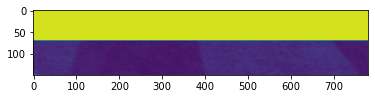

In [98]:
shots = read_string_from_box(image, (1020, 840), (1800, 990)) #lower part (1100, 830)
(300, 155), (800, 220)

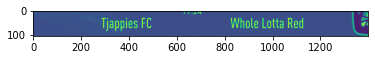

In [231]:
img_box = image[135:240, 300:1700]
plt.imshow(img_box)

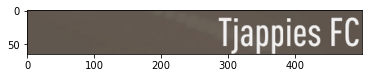

Tey saa



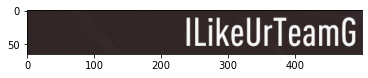

ILikeUrTeamG



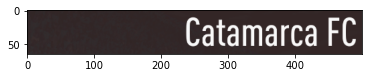

ICCC n aM



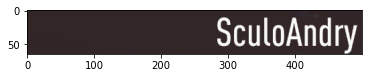

SculoAndry



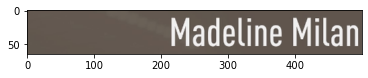

Madeline Milan



In [254]:
images = ["data/WL261.jpg", "data/10-11-2020_16-35-36-0ag1a4hv.png", 
         "data/10-11-2020_16-35-35-qyrqt4lh.png",
          "data/10-11-2020_16-35-36-0wd3xedc.png",
            "data/WL249.jpg"
         ]

resolution = (1080, 1920, 3)
for image_path in images:
    image = cv2.imread(image_path)
    image = cv2.resize(image, dsize=(1920, 1080), interpolation=cv2.INTER_NEAREST)
    (300, 155), (800, 220)
    plt.imshow(image[155:220, 300:800])
    plt.show()
    config = r'--psm 6 --oem 3 '#-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
    result = pytesseract.image_to_string(image[155:220, 300:800], config=config)
    print(result)

In [227]:
config = r'--psm 6 --oem 3 '#-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
result = pytesseract.image_to_string(image[135:240, 300:1700], config=config)
print(result)

0.075

In [96]:
result

'9\n7\n48\n8\n0\n3\n71\n90\n\x0c'